In [1]:
from document_pipeline import DocumentPipeline
import leidenalg
import igraph as ig

In [2]:
pipeline = DocumentPipeline()

In [3]:
pipeline.load("storage/run2")

In [4]:
pipeline.run("storage/run2/config.json")

Triplet handler created with 59 nodes and 61 edges.


Visiting community 2
Visiting community 4
Visiting community 0
Visiting community 1
Visiting community 5
Visiting community 3
Visiting community 6
Visiting community 7
Visiting community 8


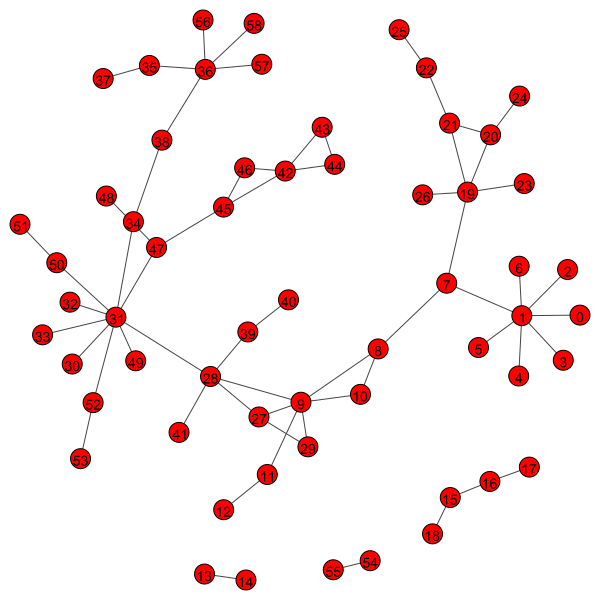

In [5]:
import igraph as ig
import matplotlib.pyplot as plt

# Create an undirected graph
g = pipeline.triplet_handler._graph
g.vs["label"] = [str(i) for i in range(g.vcount())]
layout = g.layout("fr")
ig.plot(g, layout=layout, vertex_label=g.vs["label"])

Starting node: 20
[20, 21, 22, 25, 24, 19, 23, 26, 19, 7, 1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 29, 28, 39, 40, 41, 28, 31, 47, 45, 42, 43, 44, 46, 48, 47, 30, 32, 33, 49, 50, 51, 52, 53, 31, 34, 38, 36, 35, 37, 56, 57, 58, 34, 15, 16, 17, 18, 13, 14, 54, 55]


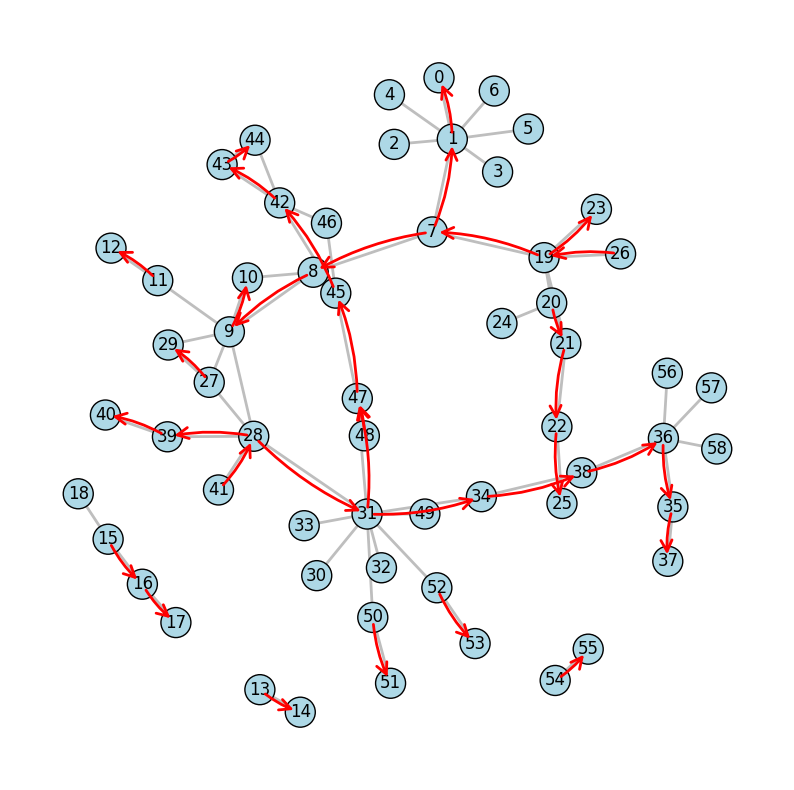

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

# Create an undirected graph
g = pipeline.triplet_handler._graph
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Example traversal path and parent list
traversal_path = pipeline.triplet_handler.global_traversal
parent_nodes = pipeline.triplet_handler.global_traversal_parents
print(f"Starting node: {traversal_path[0]}")
print(traversal_path)
# Highlight the traversal path
# Set default vertex and edge colors
g.vs["color"] = "lightblue"
g.es["color"] = "grey"

# Highlight the edges in the traversal path and add arrows
arrow_edges = []
for i in range(1, len(traversal_path)):
    current_node = traversal_path[i]
    parent_node = parent_nodes[i]
    if parent_node is not None:
        eid = g.get_eid(parent_node, current_node, directed=False)
        g.es[eid]["color"] = "red"
        arrow_edges.append((parent_node, current_node))

# Plot the graph
layout = g.layout("fr")

# Basic plot without arrows
ig.plot(g, layout=layout, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"])

# Add arrows manually using matplotlib for visualization
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size here
ig.plot(g, layout=layout, target=ax, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"])

# Convert layout to a dictionary for easy access
layout_coords = {i: layout[i] for i in range(len(layout))}

# Draw arrows on the graph to indicate traversal order
for start, end in arrow_edges:
    start_coords = layout_coords[start]
    end_coords = layout_coords[end]
    ax.annotate("",
                xy=end_coords, xycoords='data',
                xytext=start_coords, textcoords='data',
                arrowprops=dict(arrowstyle="->", color="red", lw=2,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.1",
                                mutation_scale=20))  # Adjust mutation_scale for arrowhead size

plt.show()


In [7]:
print(pipeline.triplet_handler.global_traversal)

[20, 21, 22, 25, 24, 19, 23, 26, 19, 7, 1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 27, 29, 28, 39, 40, 41, 28, 31, 47, 45, 42, 43, 44, 46, 48, 47, 30, 32, 33, 49, 50, 51, 52, 53, 31, 34, 38, 36, 35, 37, 56, 57, 58, 34, 15, 16, 17, 18, 13, 14, 54, 55]


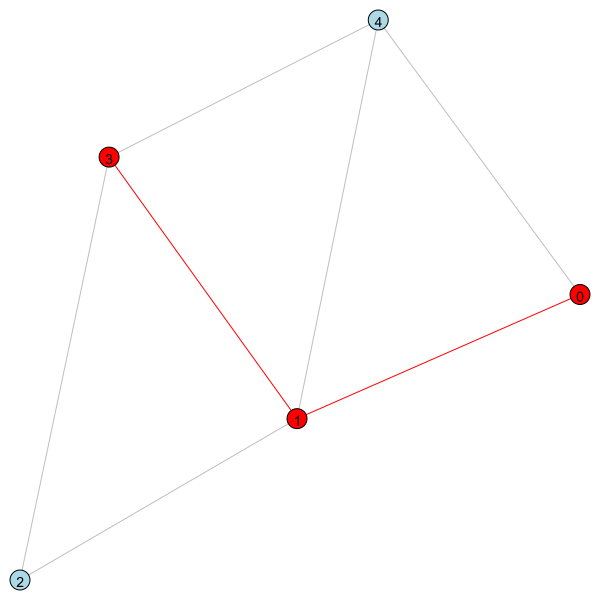

In [8]:
import igraph as ig
import matplotlib.pyplot as plt

# Create a sample graph
g = ig.Graph(edges=[(0, 1), (1, 2), (2, 3), (3, 4), (0, 4), (1, 3), (1, 4)], directed=False)
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Perform a traversal (e.g., a BFS traversal)
start_vertex = 0
end_vertex = 3
path = g.get_shortest_paths(start_vertex, to=end_vertex, output="vpath")[0]

# Highlight the path
# Set default vertex and edge colors
g.vs["color"] = "lightblue"
g.es["color"] = "grey"

# Highlight the vertices in the path
for vertex in path:
    g.vs[vertex]["color"] = "red"

# Highlight the edges in the path
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
for edge in path_edges:
    eid = g.get_eid(edge[0], edge[1])
    g.es[eid]["color"] = "red"

# Plot the graph
layout = g.layout("fr")
ig.plot(g, layout=layout, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"])

# Alternatively, you can save the plot to an image file
# ig.plot(g, layout=layout, vertex_label=g.vs["label"], vertex_color=g.vs["color"], edge_color=g.es["color"]).save("graph.png")
